In [1]:
import numpy as np
import cv2
import urllib.request
import matplotlib.pyplot as plt

from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.ops import expand_dims, sigmoid
from keras.datasets import cifar10
from keras.utils import to_categorical, plot_model

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

from models_lib import MyModel

2024-02-19 15:28:09.805113: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 15:28:09.805145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 15:28:09.806708: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-19 15:28:09.815312: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-19 15:28:10.850295: W tensorflow/compiler/tf2

In [2]:
path = "/home/alex/Python_projects/HW_Data_Science/models/model_cifar10_cat_dog_vgg4_20240219-151410.h5"
loaded_model = load_model(path)

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train, X_test = X_train / 255., X_test / 255.

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
y_pred_prob = loaded_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

2024-02-19 15:28:14.552544: I external/local_xla/xla/service/service.cc:168] XLA service 0x559f6603afd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-19 15:28:14.552568: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-02-19 15:28:14.567969: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-19 15:28:14.683869: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-19 15:28:14.784335: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


 36/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

I0000 00:00:1708349297.290949   32021 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step


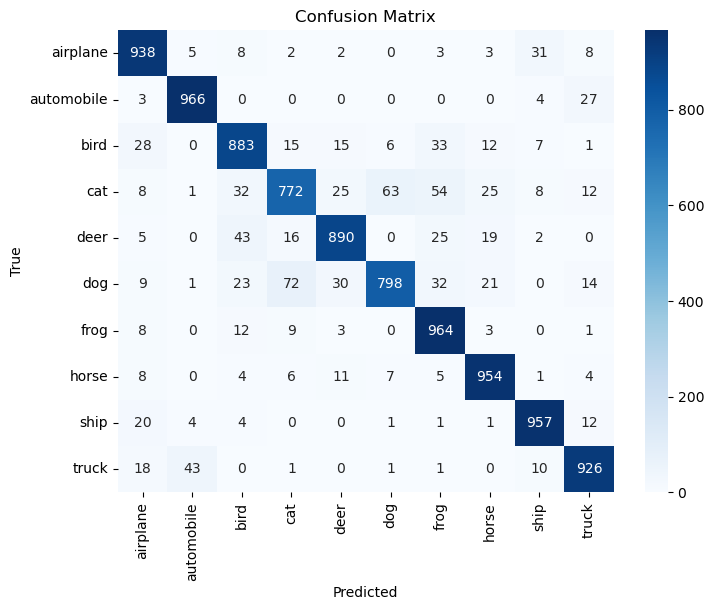

In [6]:
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Візуалізація Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [7]:
test_acc = loaded_model.evaluate(X_test, y_test)
print("test acc:", test_acc[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9068 - loss: 0.6574 - precision_class0: 0.9221 - precision_class1: 0.9469 - precision_class2: 0.9039 - precision_class3: 0.8867 - precision_class4: 0.9345 - precision_class5: 0.9244 - precision_class6: 0.8880 - precision_class7: 0.9441 - precision_class8: 0.9380 - precision_class9: 0.9282 - recall_class0: 0.9150 - recall_class1: 0.9651 - recall_class2: 0.8703 - recall_class3: 0.7550 - recall_class4: 0.8621 - recall_class5: 0.7835 - recall_class6: 0.9560 - recall_class7: 0.9509 - recall_class8: 0.9573 - recall_class9: 0.9237
test acc: 0.904699981212616


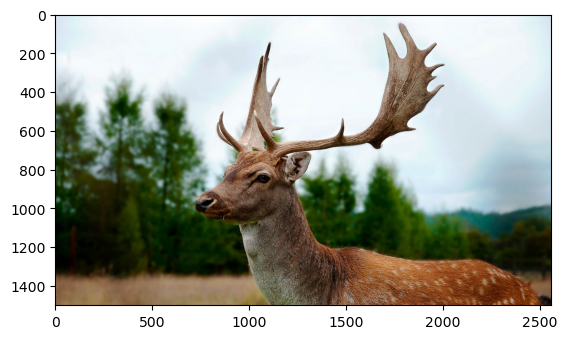

In [8]:
url = "https://fengel-b2b-umbraco-prod.azurewebsites.net/media/tmnd3gb4/hero_d%C3%A5dyr.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [9]:
image = cv2.resize(image, (32,32))

image = image.astype('float32')/255.

image = image.reshape((1, 32, 32, 3))

In [10]:
prediction = loaded_model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [11]:
predicted_class = prediction.argmax()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('Predicted class: ', class_names[predicted_class])

Predicted class:  deer


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
This image is 50.00% cat and 50.00% others.


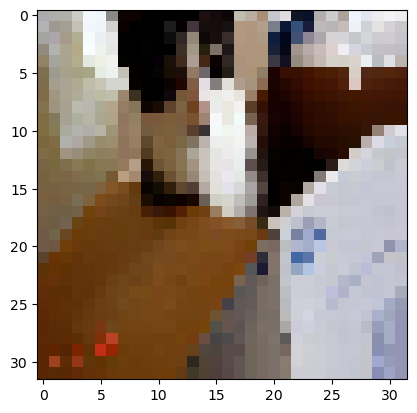

In [16]:
img = load_img("/home/alex/Python_projects/HW_Data_Science/cat_dog/test/cat_0_4592.jpeg", target_size=(32, 32))
plt.imshow(img)

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = expand_dims(img_array, axis=0)

predictions = loaded_model.predict(img_array)
score = float(sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% others.")

In [17]:
predicted_class = predictions.argmax()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('Predicted class: ', class_names[predicted_class])

Predicted class:  cat


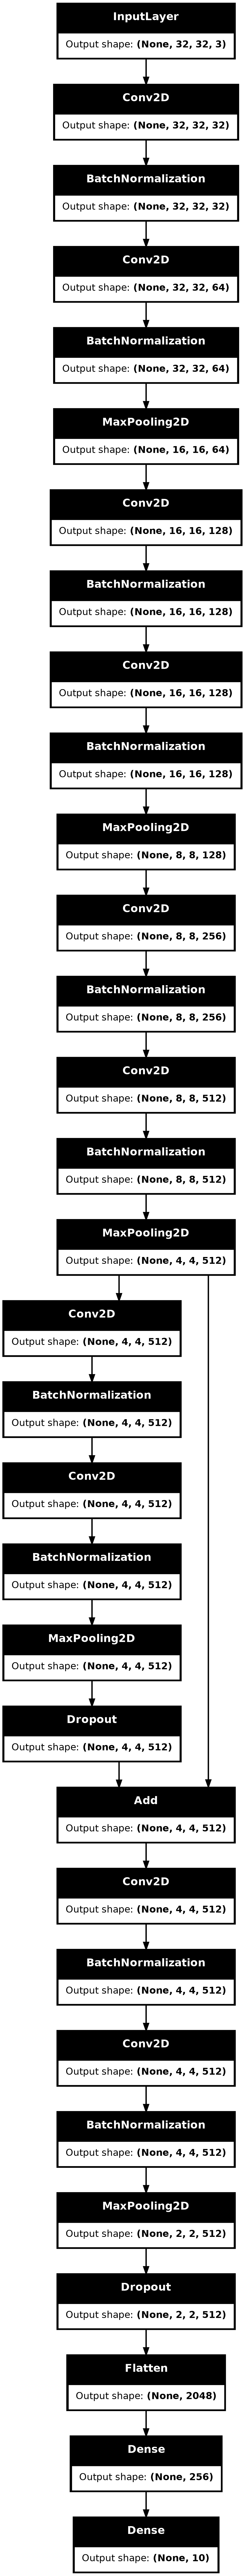

In [14]:
filtermodel = MyModel()
model_filter = filtermodel.build()
    
plot_model(model_filter, "my_model.png", show_shapes=True)

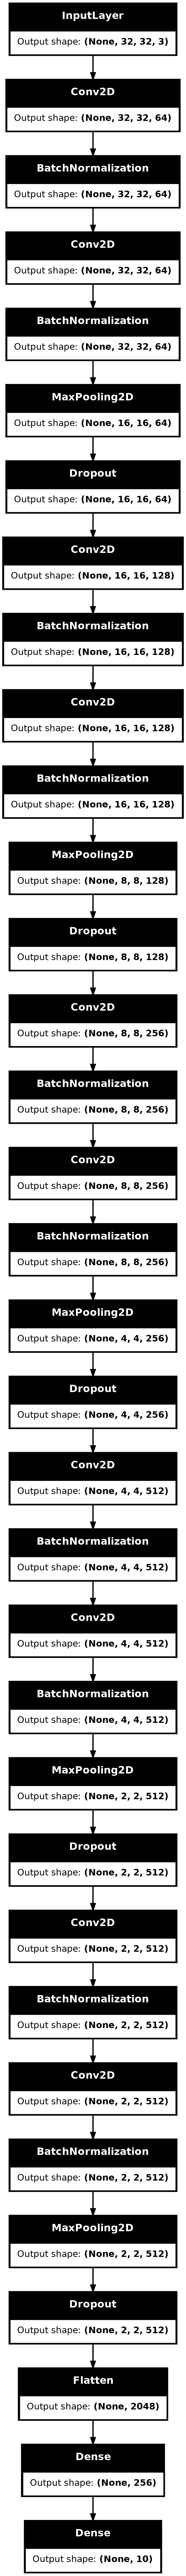

In [15]:
plot_model(loaded_model, "my_first_model.png", show_shapes=True)